In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [23]:
df=pd.read_csv('BD_economic_indicators.csv')
df.head(5)

,Year,GDP,GDP per capita,GDP growth,Inflation rate,Unemployed rate,Government debt,Total Investment
0,1980,41.2,500,3.10%,15.40%,NaN,NaN,14.44%
1,1981,47.4,560,5.60%,14.50%,NaN,NaN,17.16%
2,1982,52.0,597,3.20%,12.90%,NaN,NaN,17.36%
3,1983,56.5,633,4.60%,9.50%,NaN,NaN,16.56%
4,1984,61.0,664,4.20%,10.40%,NaN,NaN,16.48%


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Year              40 non-null     int64  
 1   GDP               40 non-null     float64
 2   GDP per capita    40 non-null     object 
 3   GDP growth        40 non-null     object 
 4   Inflation rate    40 non-null     object 
 5   Unemployed rate   29 non-null     object 
 6   Government debt   17 non-null     object 
 7   Total Investment  40 non-null     object 
dtypes: float64(1), int64(1), object(6)
memory usage: 2.6+ KB


In [30]:
x=df.iloc[:,0:1].values
y=df.iloc[:,1:2].values
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.15,random_state=0)
from sklearn import linear_model
lasso_reg=linear_model.Lasso(alpha=200,max_iter=300,tol=0.3)
lasso_reg.fit(x_train,y_train)
y_pred=lasso_reg.predict(x_test)
print(y_pred)

[305.62680843 273.72957447 353.47265936  18.55170282 114.24340469
 193.98648958]


In [31]:
y_test

array([[205.7],
       [180.2],
       [265.5],
       [ 61. ],
       [ 91.1],
       [128.2]])

In [35]:
lasso_reg.score(x_train,y_train)

0.8606884549787448

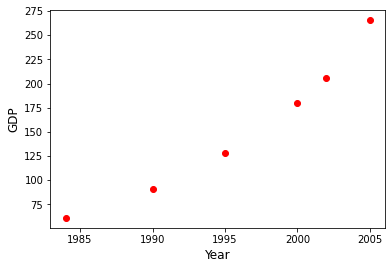

In [36]:
%matplotlib inline
plt.scatter(x_test,y_test,color='red')
plt.xlabel('Year',size=12)
plt.ylabel('GDP',size=12)
plt.show()

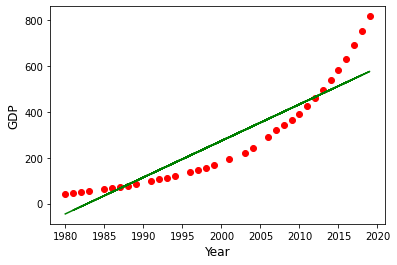

In [37]:
%matplotlib inline
plt.scatter(x_train,y_train,color='red')
plt.xlabel('Year',size=12)
plt.ylabel('GDP',size=12)
plt.plot(x_train,lasso_reg.predict(x_train),color='green')
plt.show()

In [38]:
from sklearn.tree import DecisionTreeRegressor
regressor=DecisionTreeRegressor()
regressor.fit(x,y)

y_pred=regressor.predict([[10]])
print(y_pred)


[41.2]


In [39]:
regressor.score(x_train,y_train)

1.0

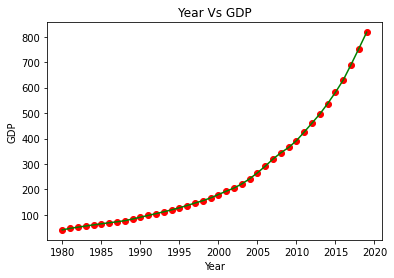

In [40]:
plt.scatter(x,y,color='red')
plt.plot(x,regressor.predict(x),color='green')
plt.title('Year Vs GDP')
plt.xlabel('Year')
plt.ylabel('GDP')
plt.show()

In [41]:
df1=df.dropna()

In [42]:
df.shape

(40, 8)

In [43]:
df1.shape

(17, 8)

In [44]:
df2=df1.replace('%','',regex=True)

In [45]:
df3=df2.replace({
    'GDP per capita': ','
},'',regex=True)
df3

,Year,GDP,GDP per capita,GDP growth,Inflation rate,Unemployed rate,Government debt,Total Investment
23,2003,221.9,1594,5.80,5.40,4.32,44.30,24.68
24,2004,241.9,1713,6.10,6.10,4.30,43.50,24.99
25,2005,265.5,1855,6.30,7.00,4.25,42.30,25.83
26,2006,291.4,2018,6.90,6.80,3.59,42.30,26.14
27,2007,319.7,2183,6.50,9.10,3.77,41.90,26.18
28,2008,344.0,2325,5.50,8.90,4.07,40.60,26.20
29,2009,365.0,2441,5.30,4.90,5.00,39.50,26.21
30,2010,391.7,2592,6.00,9.40,3.37,35.50,26.25
31,2011,425.8,2785,6.50,11.50,3.71,36.60,27.42
32,2012,460.8,2979,6.30,6.20,4.04,36.20,28.26


In [46]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17 entries, 23 to 39
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Year              17 non-null     int64  
 1   GDP               17 non-null     float64
 2   GDP per capita    17 non-null     object 
 3   GDP growth        17 non-null     object 
 4   Inflation rate    17 non-null     object 
 5   Unemployed rate   17 non-null     object 
 6   Government debt   17 non-null     object 
 7   Total Investment  17 non-null     object 
dtypes: float64(1), int64(1), object(6)
memory usage: 1.2+ KB


In [47]:
df3['GDP growth']=df3['GDP growth'].apply(float)
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17 entries, 23 to 39
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Year              17 non-null     int64  
 1   GDP               17 non-null     float64
 2   GDP per capita    17 non-null     object 
 3   GDP growth        17 non-null     float64
 4   Inflation rate    17 non-null     object 
 5   Unemployed rate   17 non-null     object 
 6   Government debt   17 non-null     object 
 7   Total Investment  17 non-null     object 
dtypes: float64(2), int64(1), object(5)
memory usage: 1.2+ KB


In [48]:
df3['GDP per capita']=df3['GDP per capita'].astype(int)
df3['GDP growth']=df3['GDP growth'].astype(float)
df3['Inflation rate']=df3['Inflation rate'].astype(float)
df3['Unemployed rate']=df3['Unemployed rate'].astype(float)
df3['Government debt']=df3['Government debt'].astype(float)
df3['Total Investment']=df3['Total Investment'].astype(float)



In [49]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17 entries, 23 to 39
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Year              17 non-null     int64  
 1   GDP               17 non-null     float64
 2   GDP per capita    17 non-null     int32  
 3   GDP growth        17 non-null     float64
 4   Inflation rate    17 non-null     float64
 5   Unemployed rate   17 non-null     float64
 6   Government debt   17 non-null     float64
 7   Total Investment  17 non-null     float64
dtypes: float64(6), int32(1), int64(1)
memory usage: 1.1 KB


In [50]:
x=df3['Year']
y=df3['Total Investment']
import seaborn as sns

C:\Users\nafissaad\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


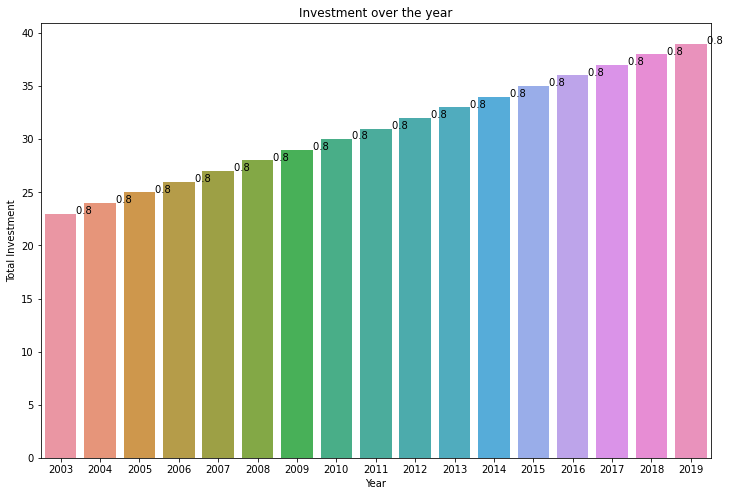

In [51]:
plt.figure(figsize=(12,8))
ax=sns.barplot(x,y.index)
plt.xlabel('Year')
plt.ylabel('Total Investment')
plt.title('Investment over the year')
for patch in ax.patches:
    width=patch.get_width()
    height=patch.get_height()
    x=patch.get_x()
    y=patch.get_y()
    plt.text(width + x, height + y, '{:.1f} '.format(width))


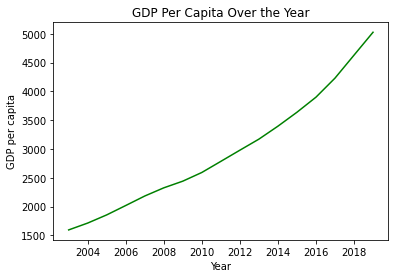

In [52]:
plt.plot(df3.Year,df3['GDP per capita'],color='green')
plt.title('GDP Per Capita Over the Year')
plt.xlabel('Year')
plt.ylabel('GDP per capita')
plt.show()